# EM502 Lab 05: Optimality Conditions for CNOP and KKT Problems - E/17/371

## Lab 05 Part I

### Consider the following optimi ation problem

Minimise
$$f(x_1,x_2)=−x_1$$

subject to
$$g_1(x_1,x_2)=x_2-(1-x_1)^3<=0$$
$$g_2(x_1,x_2)=-x_2<=0$$

a) Using the helper functions provided determine if this problem admits Lagrange multipliers.

In [9]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from IPython.display import display, Latex
from matplotlib import patches
from scipy import optimize as opt
from sympy import pprint, latex, root

# Define the Lagrangian and its gradient
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
m1 = sym.Symbol(r"\mu_1")
m2 = sym.Symbol(r"\mu_2")
f = -x1
g1 = x2 - (1-x1)**3
g2 = -x2

# Gradient of the constrats
dg1 = sym.Matrix([sym.diff(g1,x1),sym.diff(g1,x2)])
dg2 = sym.Matrix([sym.diff(g2,x1),sym.diff(g2,x2)])
display(Latex(r"$\nabla \mathbf{g1}=$"),dg1)
display(Latex(r"$\nabla \mathbf{g2}=$"),dg2)

<IPython.core.display.Latex object>

Matrix([
[3*(1 - x_1)**2],
[             1]])

<IPython.core.display.Latex object>

Matrix([
[ 0],
[-1]])

> The gradients of the contraints are not linearly independent at $x1=1$. Therefore it is not a regular point, and the problemd does not admit Lagrangian multipliers

b) Can you write the gradient of the objective function as a linear combination of the gradients of the constraints?

In [10]:
# Gradient of the objective function
df = sym.Matrix([sym.diff(f,x1),sym.diff(f,x2)])
display(Latex(r"$\nabla \mathbf{f}=$"),df)

<IPython.core.display.Latex object>

Matrix([
[-1],
[ 0]])

> Gradient of the objective function is perpendicular to those of the constraints, and cannot be written as a linear combination of those.

### Ditermine the KKT points for the following CNOP. Check if they give local minimum points.

a) Minimise 
$$f(x_1,x_2,x_3)=-3x_1+x_2-x_3^2$$
subject to:
$$g(x_1,x_2,x_3)=x_1+x_2-x_3<=0$$
$$h(x_1,x_2,x_3)=-x_1+2x_2-x_3^2=0$$

In [19]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")
m = sym.Symbol(r"\mu")
l = sym.Symbol(r"\lambda")
f = -3*x1 + x2 - x3**2
g = x1 + x2 + x3
h = -x1 + 2*x2 + x3**2
L = f + m*g + l*h
display(Latex(r"$L=$"),L)

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)

dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)

kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), m*g, l*h)
sol = sym.solve(kkt,(x1,x2,x3,m,l))
display(Latex(r"$X=$"),sym.Matrix(sol[0][:3]))
display(Latex(r"$\mu=$"),sol[0][3])
display(Latex(r"$\lambda=$"),sol[0][4])
display(Latex(r"$\nabla^2 L=$"),dL2.subs({m:sol[0][3],l:sol[0][4]}))


<IPython.core.display.Latex object>

\lambda*(-x_1 + 2*x_2 + x_3**2) + \mu*(x_1 + x_2 + x_3) - 3*x_1 + x_2 - x_3**2

<IPython.core.display.Latex object>

Matrix([
[         -\lambda + \mu - 3],
[        2*\lambda + \mu + 1],
[2*\lambda*x_3 + \mu - 2*x_3]])

<IPython.core.display.Latex object>

Matrix([
[0, 0,             0],
[0, 0,             0],
[0, 0, 2*\lambda - 2]])

<IPython.core.display.Latex object>

Matrix([
[-115/588],
[ -95/588],
[    5/14]])

<IPython.core.display.Latex object>

5/3

<IPython.core.display.Latex object>

-4/3

<IPython.core.display.Latex object>

Matrix([
[0, 0,     0],
[0, 0,     0],
[0, 0, -14/3]])

> $\nabla^2 L$ contains a negative value. Not posittive definite. $X$ is not a minimum.

b) Minimise 
$$f(x_1,x_2,x_3)=x_1^2+x_2^2+x_3^2$$
subject to:
$$h_1(x_1,x_2,x_3)=\frac{x_1^2}{4}+\frac{x_2^2}{5}+\frac{x_3^2}{25}-1=0$$
$$h_2(x_1,x_2,x_3)=x_1+x_2-x_3=0$$

In [20]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")
l1 = sym.Symbol(r"\lambda_1")
l2 = sym.Symbol(r"\lambda_2")

f = x1**2 + x2**2 + x3**2
h1 = x1**2/4 + x2**2/5 + x3**2/25 - 1
h2 = x1 + x2 - x3
L = f + l1*h1 + l2*h2
display(Latex(r"$L=$"),L)

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)

dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)
# print(latex(dL2))

kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), l1*h1, l2*h2)
sol = sym.solve(kkt,(x1,x2,x3,l1,l2))
for i,s in enumerate(sol):
    print(f"\nSolution {i+1}:")
    # display(Latex("$"+latex(s)+"$"))
    display(Latex(r"$X=$"),sym.Matrix(s[:3]))
    display(Latex(r"$\lambda=$"),sym.Matrix(s[3:]))
    x_sol = [i.evalf() for i in s]
    f_sol = f.subs({x1:x_sol[0], x2:x_sol[1], x3:x_sol[2]})
    display(Latex("$f(X)=$"),Latex(f"{f_sol:.3f}"))
    display(Latex(r"$\nabla^2 L=$"),dL2.subs({l1:s[3],l2:s[4]}))
    
    if any([m < 0 for m in []]):
        print("INVALID MULTIPLIERS")
    elif any([l == 0 for l in [s[3]]]):
        print("INVALID MULTIPLIERS")

<IPython.core.display.Latex object>

\lambda_1*(x_1**2/4 + x_2**2/5 + x_3**2/25 - 1) + \lambda_2*(x_1 + x_2 - x_3) + x_1**2 + x_2**2 + x_3**2

<IPython.core.display.Latex object>

Matrix([
[   \lambda_1*x_1/2 + \lambda_2 + 2*x_1],
[ 2*\lambda_1*x_2/5 + \lambda_2 + 2*x_2],
[2*\lambda_1*x_3/25 - \lambda_2 + 2*x_3]])

<IPython.core.display.Latex object>

Matrix([
[\lambda_1/2 + 2,                 0,                  0],
[              0, 2*\lambda_1/5 + 2,                  0],
[              0,                 0, 2*\lambda_1/25 + 2]])


Solution 1:


<IPython.core.display.Latex object>

Matrix([
[-2],
[ 0],
[ 0]])

<IPython.core.display.Latex object>

Matrix([
[-4],
[ 0]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[0,   0,     0],
[0, 2/5,     0],
[0,   0, 42/25]])


Solution 2:


<IPython.core.display.Latex object>

Matrix([
[ 0],
[ 0],
[-5]])

<IPython.core.display.Latex object>

Matrix([
[-25],
[  0]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[-21/2,  0, 0],
[    0, -8, 0],
[    0,  0, 0]])


Solution 3:


<IPython.core.display.Latex object>

Matrix([
[0],
[0],
[0]])

<IPython.core.display.Latex object>

Matrix([
[0],
[0]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[2, 0, 0],
[0, 2, 0],
[0, 0, 2]])

INVALID MULTIPLIERS

Solution 4:


<IPython.core.display.Latex object>

Matrix([
[0],
[0],
[5]])

<IPython.core.display.Latex object>

Matrix([
[-25],
[  0]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[-21/2,  0, 0],
[    0, -8, 0],
[    0,  0, 0]])


Solution 5:


<IPython.core.display.Latex object>

Matrix([
[       0],
[-sqrt(5)],
[       0]])

<IPython.core.display.Latex object>

Matrix([
[-5],
[ 0]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[-1/2, 0,   0],
[   0, 0,   0],
[   0, 0, 8/5]])


Solution 6:


<IPython.core.display.Latex object>

Matrix([
[      0],
[sqrt(5)],
[      0]])

<IPython.core.display.Latex object>

Matrix([
[-5],
[ 0]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[-1/2, 0,   0],
[   0, 0,   0],
[   0, 0, 8/5]])


Solution 7:


<IPython.core.display.Latex object>

Matrix([
[2],
[0],
[0]])

<IPython.core.display.Latex object>

Matrix([
[-4],
[ 0]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[0,   0,     0],
[0, 2/5,     0],
[0,   0, 42/25]])


Solution 8:


<IPython.core.display.Latex object>

Matrix([
[-20*sqrt(646)/323],
[ 35*sqrt(646)/646],
[ -5*sqrt(646)/646]])

<IPython.core.display.Latex object>

Matrix([
[            -75/17],
[-70*sqrt(646)/5491]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[-7/34,    0,     0],
[    0, 4/17,     0],
[    0,    0, 28/17]])


Solution 9:


<IPython.core.display.Latex object>

Matrix([
[ 20*sqrt(646)/323],
[-35*sqrt(646)/646],
[  5*sqrt(646)/646]])

<IPython.core.display.Latex object>

Matrix([
[           -75/17],
[70*sqrt(646)/5491]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[-7/34,    0,     0],
[    0, 4/17,     0],
[    0,    0, 28/17]])


Solution 10:


<IPython.core.display.Latex object>

Matrix([
[-2*sqrt(95)/19],
[-3*sqrt(95)/19],
[-5*sqrt(95)/19]])

<IPython.core.display.Latex object>

Matrix([
[           -10],
[-6*sqrt(95)/19]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[-3,  0,   0],
[ 0, -2,   0],
[ 0,  0, 6/5]])


Solution 11:


<IPython.core.display.Latex object>

Matrix([
[2*sqrt(95)/19],
[3*sqrt(95)/19],
[5*sqrt(95)/19]])

<IPython.core.display.Latex object>

Matrix([
[          -10],
[6*sqrt(95)/19]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[-3,  0,   0],
[ 0, -2,   0],
[ 0,  0, 6/5]])

> Solutions 1, 3, and 7 have positive definine $\nabla^2 L$, and therefore are minimums.

## Lab 05 Part II

### Activity 1

Consider the following optimisation problem: minimise
$$f(x)= -2x_1x_2+2x_1-x_1^2-2x_2^2$$
subject to:
$$x_1^3-x_2=0$$
$$-x_2+(x_1-1)^4+2<=0$$
within bounds
$$0.5<=x_1<=1.5$$
$$1.5<=x_2<=2.5$$

[0, 3, 0, 3]

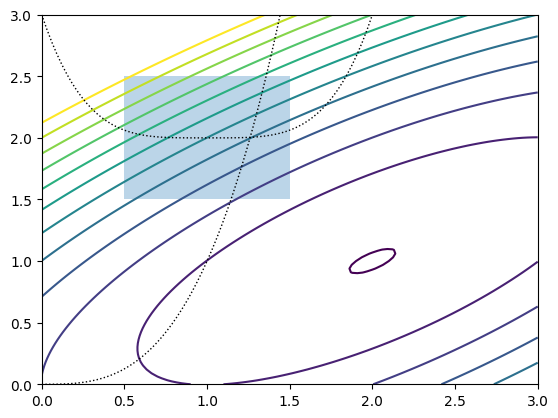

In [13]:
# Define objective function
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

# Contours of the objective function and the constraints
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1));
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])
[0, 3, 0, 3]

In [14]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

x0 = [3, 4]
# Unconstrained
ux = opt.minimize(f, x0, constraints=None)
ux

      fun: -1.9999999999999571
 hess_inv: array([[0.98942657, 0.49330774],
       [0.49330774, 0.49576443]])
      jac: array([-1.78813934e-07, -1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.99999972, 0.99999982])

In [15]:
# Constrained
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

     fun: 2.0499154720914454
     jac: array([-3.48747873,  5.49674416])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.26089314, 2.00463288])

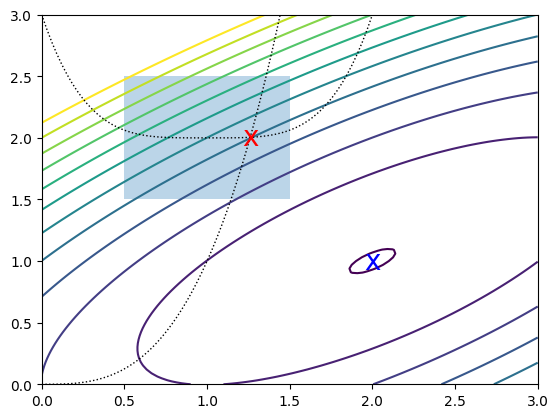

In [16]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1));
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);

> The unconstrained optimal point is $(1.99999972, 0.99999982)$. When taking constraints into account, this has shifted to $(1.26089314, 2.00463288)$. Therefore, the constraints are active.

b) Is it possible to find the Lagrange multipliers for this problem?

In [26]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
g = -x2 + (x1-1)**4 + 2
h = x1**3 - x2

# The gradients of the constraints
dg = sym.Matrix([[sym.diff(g,x1)],[sym.diff(g,x2)]])
display(Latex(r"$\nabla \mathbf{g}=$"),dg)
display(Latex(r"$\nabla \mathbf{g}(1.261,2.005)=$"),dg.subs({x1:1.261,x2:2.005}))
dh = sym.Matrix([[sym.diff(h,x1)],[sym.diff(h,x2)]])
display(Latex(r"$\nabla \mathbf{h}=$"),dh)
display(Latex(r"$\nabla \mathbf{h}(1.261,2.005)=$"),dh.subs({x1:1.261,x2:2.005}))

<IPython.core.display.Latex object>

Matrix([
[4*(x_1 - 1)**3],
[            -1]])

<IPython.core.display.Latex object>

Matrix([
[0.0711183239999999],
[                -1]])

<IPython.core.display.Latex object>

Matrix([
[3*x_1**2],
[      -1]])

<IPython.core.display.Latex object>

Matrix([
[4.770363],
[      -1]])

> The gradients of the constraints are linearly independent of each other at the optimal point. Therefore, it is a regular point, and Langrangian multipliers can be found for the problem.

### Activity 2

Minimise
$$f(x)=(x_1-1)^2+x_2-2$$
subject to:
$$h(x)=x_2-x_1-1=0$$
$$g(x)=x_1+x_2-2<=0$$
Identify the active contraints

In [34]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")
m = sym.Symbol(r"\mu")
l = sym.Symbol(r"\lambda")
f = (x1-1)**2 + x2 -2
g = x1 + x2 - 2
h = x2 - x1 -1
L = f + m*g + l*h
display(Latex(r"$L=$"),L)

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)

dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)

kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), m*g, l*h)
sol = sym.solve(kkt,(x1,x2,x3,m,l))
display(Latex(r"$X=$"),sym.Matrix(sol[0][:3]))
display(Latex(r"$\mu=$"),sol[0][3])
display(Latex(r"$\lambda=$"),sol[0][4])
display(Latex(r"$\nabla^2 L=$"),dL2.subs({m:sol[0][3],l:sol[0][4]}))
display(Latex(r"$g(X)=$"),g.subs({x1:sol[0][0],x2:sol[0][1],x3:sol[0][2]}))

<IPython.core.display.Latex object>

\lambda*(-x_1 + x_2 - 1) + \mu*(x_1 + x_2 - 2) + x_2 + (x_1 - 1)**2 - 2

<IPython.core.display.Latex object>

Matrix([
[-\lambda + \mu + 2*x_1 - 2],
[         \lambda + \mu + 1],
[                         0]])

<IPython.core.display.Latex object>

Matrix([
[2, 0, 0],
[0, 0, 0],
[0, 0, 0]])

<IPython.core.display.Latex object>

Matrix([
[1/2],
[3/2],
[x_3]])

<IPython.core.display.Latex object>

0

<IPython.core.display.Latex object>

-1

<IPython.core.display.Latex object>

Matrix([
[2, 0, 0],
[0, 0, 0],
[0, 0, 0]])

<IPython.core.display.Latex object>

0

> $\nabla^2 L$ is positive definite. Therefore X is a minimum. The active constraints are $g(x)$ and $h(x)$.